# Interactive plots with matplotlib notebook

In [47]:
%matplotlib notebook

In [48]:
import numpy as np
import pandas as pd
df = pd.read_csv('TrackBen.csv', parse_dates=[3])
df.columns=['lat','lng','height','datetime']
df.dtypes

lat                float64
lng                float64
height             float64
datetime    datetime64[ns]
dtype: object

In [49]:
import geo
from geo import circle_dist
df['dist'] = circle_dist(df['lat'], df['lng'], df['lat'].shift(), df['lng'].shift())

In [50]:
df['time_diff'] = df['datetime'] - df['datetime'].shift()

In [51]:
df = df.set_index('datetime')
df['speed'] = df['dist'] / (df['time_diff'] / np.timedelta64(1, 'h'))
df.head()

,lat,lng,height,dist,time_diff,speed
datetime,,,,,,
2016-06-05 03:01:36,54.610884,-3.055061,137.61,NaN,NaT,NaN
2016-06-05 03:02:06,54.610413,-3.055502,138.09,0.059590,00:00:30,7.150797
2016-06-05 03:02:36,54.609286,-3.056674,137.13,0.146320,00:00:30,17.558413
2016-06-05 03:03:06,54.607355,-3.058437,136.16,0.242982,00:00:30,29.157895
2016-06-05 03:03:36,54.605330,-3.059969,135.20,0.245910,00:00:30,29.509235


<IPython.core.display.Javascript object>


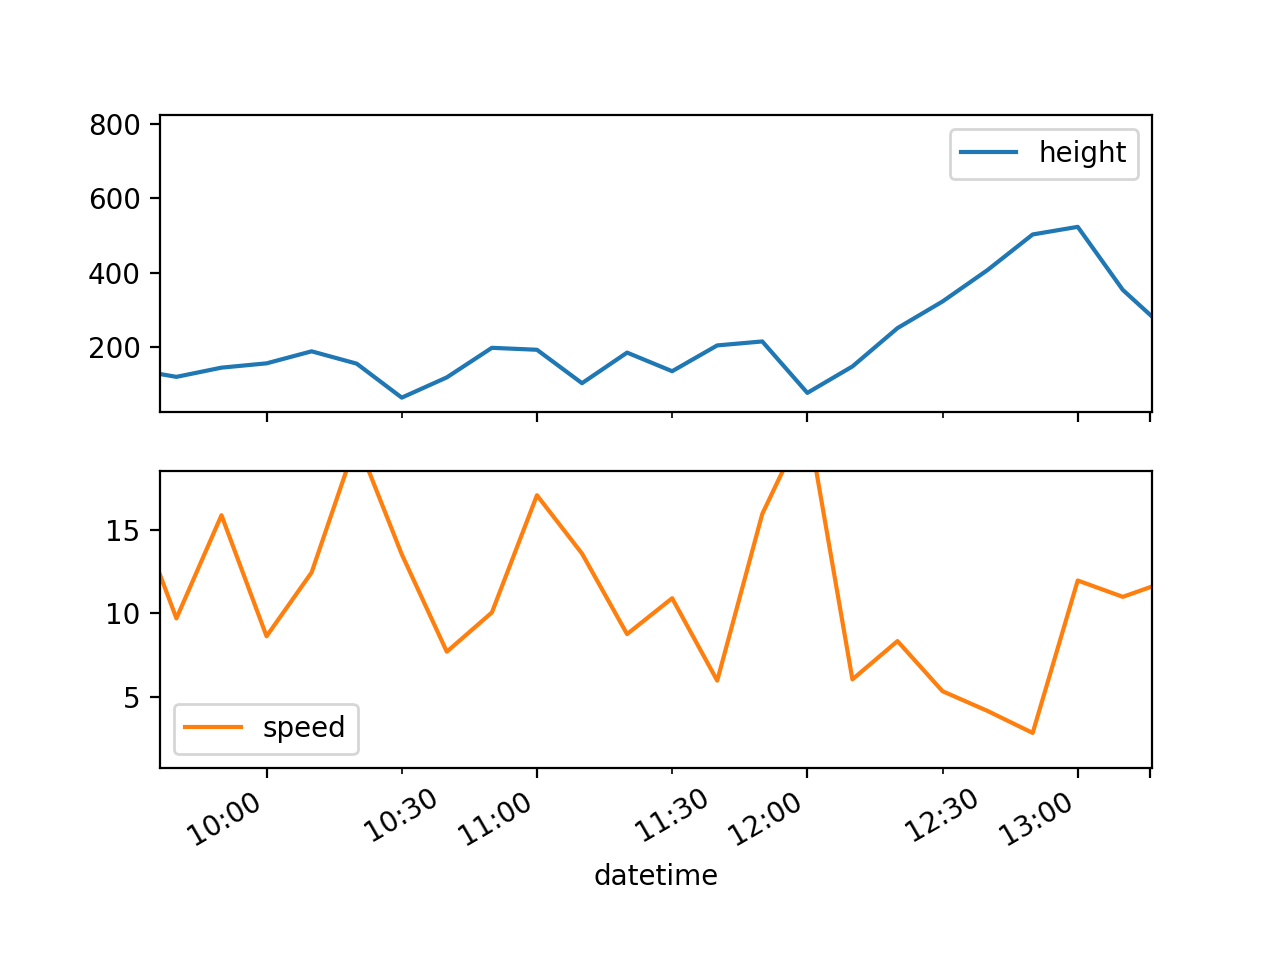

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115904a58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1163120b8>], dtype=object)

In [52]:
#resample into 10 minute intervals
mdf = df.resample('10T').mean()

mdf[['height', 'speed']].plot(subplots=True)